# Double Variable Polynomial Regression

## Install and Import Dependencies

In [2]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load Data

In [4]:
df = pd.read_csv('../DoubleVariablePolynomialRegression.ipynb/data/Fish.csv')

In [5]:
df.head()

,Height,Width,Weight
0,11.5200,4.0200,242.0
1,12.4800,4.3056,290.0
2,12.3778,4.6961,340.0
3,12.7300,4.4555,363.0
4,12.4440,5.1340,430.0


## Note: No NAN Values

In [6]:
df.isna().sum()

Height    0
Width     0
Weight    0
dtype: int64

## Normalize the Features

In [7]:
df['Height'] = (df['Height']-np.mean(df['Height']))/np.std(df['Height'])
df['Width'] = (df['Width']-np.mean(df['Width']))/np.std(df['Width'])
df.head()

,Height,Width,Weight
0,0.596579,-0.236529,242.0
1,0.821261,-0.066579,290.0
2,0.797341,0.165793,340.0
3,0.879771,0.022621,363.0
4,0.812835,0.426371,430.0


## Generate Random Test and Train Splits

In [8]:
seed = 420
train_fraction = 0.8
train = df.sample(frac=train_fraction, random_state=seed)
test = df.drop(train.index)

## Polynomial Regression Model

In [27]:
class PolynomialRegressionModel:
    def __init__(self, i, j, q, lmbda):
        """
        Polynomial Regression Model for some particular degree.
        """
        self.errors = {}
        self.q = q
        self.lmbda = lmbda
        self.i = i
        self.j = j
        self.weights = np.random.rand(i+1, j+1)

    def calculate_loss(self, X_i, t_i):
        # print('inside self.calculate_loss()')
        assert type(X_i[0]) == np.float64 and type(t_i) == np.float64 and type(X_i[1]) == np.float64, "Types are not matching. Check!"
        result = np.zeros_like(self.weights)
        a = X_i[0]
        b = X_i[1]
        t = t_i
        prediction = self.predict([(a, b)])
        # print('predicted:')
        # print(prediction)
        # print('expected')
        # print(target)

        # tmp = np.sum(self.weights * np.power(a, np.arange(self.i + 1))[:, np.newaxis] * np.power(b, np.arange(self.j + 1)), axis=(0, 1))

        exponents_a = np.arange(self.i + 1)[:, np.newaxis]
        exponents_b = np.arange(self.j + 1)
        result = -1*np.outer(np.power(a, exponents_a), np.power(b, exponents_b)) * (t - prediction)

        # print('loss: ')
        # print(result)
        return result

    def fit(self, X_train, y_train, lr=0.01, epochs=500, batch_size=20):
        """
        Fit the polynomial regression model using Batch Gradient Descent.

        Parameters:
        X_train: Input Feature variables.
        y_train: Target Variable
        lr: Learning Rate for Gradient Descent
        epochs: No of Epochs to train

        Returns:
        NA
        """
        print('Starting Training.....')
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        # print(X_train.head())
        for epoch in range(epochs):
            count = 0
            loss = np.zeros_like(self.weights)
            # print(X_train.shape[0])
            
            for i in range(X_train.shape[0]):
                # print('sample')
                # print(X_train[i][0])
                # print(X_train[i][1])
                # print(y_train[i])
                if epoch == 0 or (epoch*epochs+i)%(X_train.shape[0]/2):
                    self.errors[epoch*epochs + i] = self.calculate_error(X_train, y_train)

                X_i = (X_train[i][0],X_train[i][1])
                t_i =  y_train[i]

                if count%batch_size == 0:
                    loss /= batch_size
                    # print('loss: ')
                    # print(loss)
                    self.weights += (self.lmbda*self.q//2)*(np.abs(self.weights)**(self.q-1))
                    self.weights -= lr*loss
                    loss = np.zeros_like(self.weights)
                else:
                    loss += self.calculate_loss(X_i, t_i)
            
                count+=1
            if epoch%(epochs/10) == 0:
                print(f"epoch: {epoch}")
                print(f"Error: {self.calculate_error(X_train, y_train)}")

        return

    def calculate_error(self, X_test, y_test):
        """
        Find the error of the model on some data.

        Parameters:
        X_test: The sample Input Feature.
        y_test: The sample Target Feature.

        Returns:
        A float value that is the MSE b/w the predicted outputs and the target outputs.
        """
        predictions = self.predict(X_test)
        mse = np.mean(
            (predictions-y_test)**2
        )
        return mse

    def predict(self, X_test):
        """
        Make Predictions using the trained model.

        Parameters:
        X_test: The sample Input Features.

        Returns:
        A numpy Array with the predicted target variable value for each of the samples having
        same dimensions as X_test.
        """
        result = [] 
        for sample in X_test:
            assert type(sample[0]) == np.float64 and type(sample[1]) == np.float64, "Variable doesn't have the required type!"
            a = sample[0]
            b = sample[1]
            tmp = np.sum(self.weights * np.power(a, np.arange(self.i + 1))[:, np.newaxis] * np.power(b, np.arange(self.j + 1)), axis=(0, 1))           
            result.append(tmp)
        return np.array(result)

## Skip

In [10]:
train.head(1)

,Height,Width,Weight
25,1.72935,0.973353,725.0


In [28]:
model = PolynomialRegressionModel(i=2, j=2, q=1, lmbda=0.5)
model.fit(train.drop(['Weight'], axis=1), train['Weight'], lr=0.1, epochs=100)

Starting Training.....
epoch: 0
Error: 45678.62200108086
epoch: 10
Error: 21473.152779960707
epoch: 20
Error: 17773.69100255613
epoch: 30
Error: 16311.66502306552
epoch: 40
Error: 15580.359268564782
epoch: 50
Error: 15142.196787022933
epoch: 60
Error: 14842.352314287873
epoch: 70
Error: 14618.336594428794
epoch: 80
Error: 14441.398576708112
epoch: 90
Error: 14296.542759269974


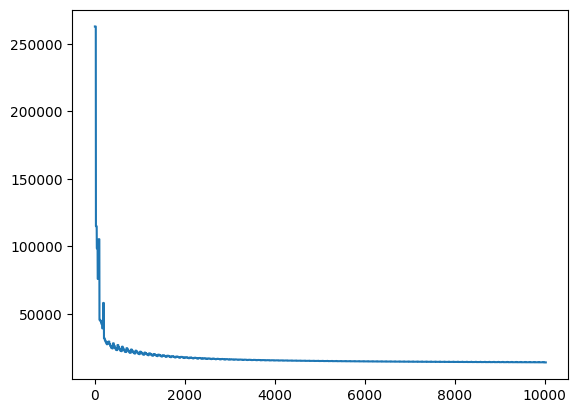

In [30]:
plt.plot(x, y)
plt.show()

In [29]:
x = model.errors.keys()
x
y = []
for i in x:
    y.append(model.errors[i])
x = np.array(list(x))
y = np.array(y)

## Testing

In [19]:
test.drop(['Weight'], axis=1)

,Height,Width
5,1.083951,0.303431
9,1.230041,0.322473
10,1.238514,0.408638
23,1.520723,1.019411
28,1.853299,1.059756
31,2.132841,1.115454
35,-1.128978,-1.279079
37,-0.794670,-0.900381
47,-0.601725,-0.367443
52,-0.022045,0.047197


In [20]:
y_pred = model.predict(list(np.array(test.drop(['Weight'], axis=1))))

In [21]:
y_pred

array([ 474.25047249,  510.64910221,  535.94252512,  757.8869782 ,
        844.80913199,  936.69253702,   37.13535535,   73.23897541,
        171.39103203,  287.9319602 ,  803.84273726,   86.37683057,
         -8.1336434 ,   50.98975495,   69.9702769 ,  133.23797963,
        160.37110612,  225.98959088,  326.83975409, 1234.75831465,
        770.61147138, 1051.34460517,  864.00910783, 1255.04266724,
        298.68238301,  317.36945675,  260.47003205,  297.49649483,
        454.88119779,  727.57730947,   22.92866759,    8.45847872])

In [22]:
true = np.array(test['Weight'])
true

array([ 450. ,  500. ,  475. ,  680. ,  850. ,  955. ,   40. ,   78. ,
        160. ,  290. ,  800. ,   90. ,    5.9,   51.5,   70. ,  130. ,
        170. ,  218. ,  300. ,  840. ,  690. , 1015. , 1100. , 1000. ,
        300. ,  430. ,  456. ,  510. ,  540. , 1600. ,   13.4,   19.9])

In [24]:
%pip install scipy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.metrics import r2_score
r2_score(y_pred, true)

0.7352449457278318